<a href="https://colab.research.google.com/github/aom12345/C-background/blob/master/rr_lyrae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RR** **Lyrae** **Light Curve**

In [1]:
!pip install numpy
!pip install matplotlib
!pip install lightkurve
!pip install astropy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 5.0 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=2d2abf16384ef8c55502fd6209332d5a4a95f2b304e6b490358641a86b93a786
  Stored in directory: /root/.cache/pip/wheels/04/15/cd/2f6227

In [ ]:
import time
import random

N = 1_000_000
REPEATS = 3

py_list = [random.random() for _ in range(N)]
best_py = float("inf")
for _ in range(REPEATS):
    t0 = time.perf_counter()
    out_py = [x + x for x in py_list]
    t1 = time.perf_counter()
    best_py = min(best_py, t1 - t0)

import numpy as np
np_array = np.array(py_list, dtype=np.float64)

best_np = float("inf")
for _ in range(REPEATS):
    t0 = time.perf_counter()
    out_np = np_array + np_array
    t1 = time.perf_counter()
    best_np = min(best_np, t1 - t0)

speedup = best_py / best_np
print(f"no of elements: {N:,}")
print(f"pure python: {best_py:.6f} s ")
print(f"numpy:     {best_np:.6f} s ")
print(f"numpyspeedup: {speedup:.2f}×")


no of elements: 1,000,000
pure python: 0.072309 s 
numpy:     0.001763 s 
numpyspeedup: 41.01×


In [ ]:
import lightkurve as lk, numpy as np, matplotlib.pyplot as plt, astropy
print("lightkurve", lk.__version__)
print("numpy", np.__version__)
print("astropy", astropy.__version__)

from astropy.timeseries import LombScargle
from lightkurve import search_lightcurve

TARGET_NAME = "RR Lyr"
MISSION = "TESS"

lightkurve 2.5.1
numpy 2.0.2
astropy 7.1.1


In [ ]:
results = search_lightcurve(TARGET_NAME, mission=MISSION)

lcs = results.download_all()
lc = lcs.stitch().remove_nans()

lc = lc.remove_outliers(sigma=6)

print(lc)

/usr/local/lib/python3.12/dist-packages/lightkurve/lightcurve.py:1154: LightkurveWarning: The light curve appears to be zero-centered (median=1.37e+04 electron / s +/- 2.91e+04 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/lightkurve/lightcurve.py:1154: LightkurveWarning: The light curve appears to be zero-centered (median=1.38e+04 electron / s +/- 2.87e+04 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/lightkurve/lightcurve.py:1154: LightkurveWarning: The light curve appears to be zero-centered (median=1.38e+04 electron / s +/- 2.93e+04 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/lightkurve/lightcu

       time             flux      ...   pos_corr1      pos_corr2   
                                  ...      pix            pix      
------------------ -------------- ... -------------- --------------
1683.3564705189142 -1.3989635e+00 ... -1.4404563e-02 -4.4739880e-02
1683.3578594148944 -1.4250795e+00 ... -1.2542778e-02 -4.5301165e-02
1683.3592483106422 -1.4508585e+00 ... -1.5601475e-02 -4.6375167e-02
 1683.360637206622 -1.4730487e+00 ... -1.7346617e-02 -4.9082343e-02
1683.3620261023686 -1.5131803e+00 ... -1.7294420e-02 -4.0988762e-02
 1683.363414998349 -1.5235877e+00 ... -1.4637413e-02 -4.1157205e-02
1683.3648038940964 -1.5630155e+00 ... -1.7352317e-02 -4.8050787e-02
 1683.366192790077 -1.5487040e+00 ... -1.7503725e-02 -4.4119917e-02
1683.3675816858245 -1.5838364e+00 ... -1.9883772e-02 -3.9234996e-02
               ...            ... ...            ...            ...
 2446.512955054673  1.5894283e+00 ... -2.8990537e-02  9.7904671e-03
2446.5198994095713  1.4525555e+00 ... -2.9867597

In [ ]:
a=np.linspace(0,1,5)
print(a)

[0.   0.25 0.5  0.75 1.  ]


To find the period :

Best period estimate: 0.566758 days


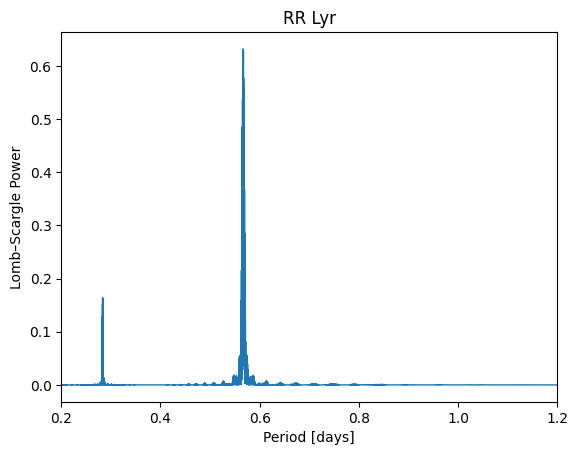

In [ ]:
time = lc.time.value    # days
flux = lc.normalize().flux.value

# Reasonable period search range for RR Lyrae (typical periods ~ 0.2–1.0 day)
min_period = 0.2
max_period = 1.2

frequency = np.linspace(1/max_period, 1/min_period, 20000)  # 20000 equally spaced points between 1/max_period and 1/min_period
ls = LombScargle(time, flux)
power = ls.power(frequency)

best_frequency = frequency[np.argmax(power)]
best_period = 1 / best_frequency
print(f"Best period estimate: {best_period:.6f} days")

# Plot
plt.figure()
plt.plot(1/frequency, power, linewidth=1)
plt.xlabel("Period [days]")
plt.ylabel("Lomb–Scargle Power")
plt.title(f"{TARGET_NAME}")
plt.xlim(min_period, max_period)
plt.show()


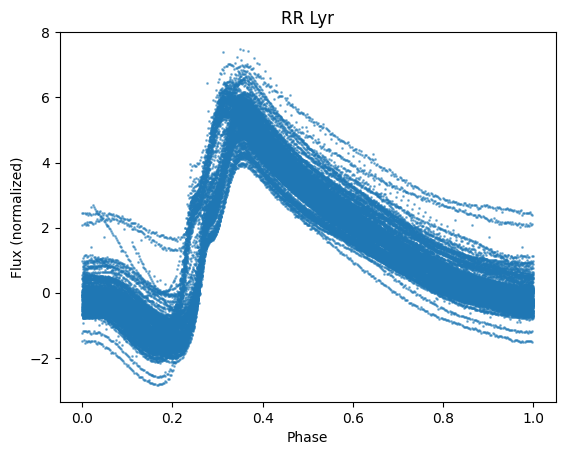

In [ ]:
phase = ( (time % best_period) / best_period )
order = np.argsort(phase)
phase_sorted = phase[order]
flux_sorted = flux[order]

plt.figure()
plt.plot(phase_sorted, flux_sorted, '.', ms=2, alpha=0.5)
plt.xlabel("Phase")
plt.ylabel("Flux (normalized)")
plt.title(f"{TARGET_NAME}")
plt.show()


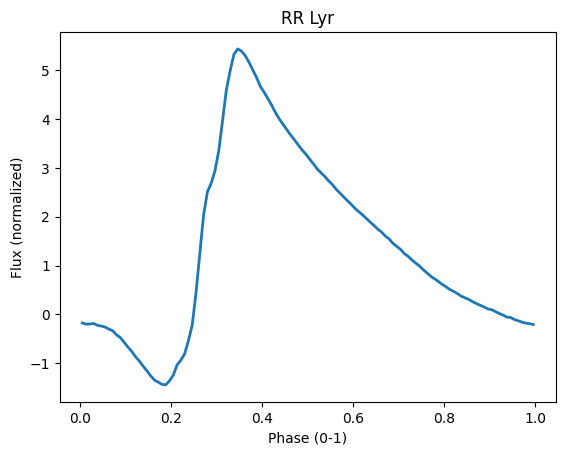

In [ ]:
def phase_bin(ph, fl, nbins):
    bins = np.linspace(0, 1, nbins+1)
    idx = np.digitize(ph, bins) - 1
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    y = np.empty(nbins)
    for i in range(nbins):
      y[i] = np.nanmedian(fl[idx==i]) if np.any(idx==i) else np.nan

    return bin_centers, y

xb, yb = phase_bin(phase_sorted, flux_sorted, nbins=120)

plt.figure()
plt.plot(xb, yb,'-', lw=2)
plt.xlabel("Phase (0-1)")
plt.ylabel("Flux (normalized)")
plt.title(f"{TARGET_NAME}")
plt.show()


In [ ]:
def distance_modulus(mu):
    return 10 ** ((mu + 5.0) / 5.0)

def rrlyrae_distance(P_days, m, A,a=-1.14,b= -2.38):
    logP = np.log10(P_days)
    M = (a + b*logP)
    mu = m - M - A
    d_pc = distance_modulus(mu)
    return d_pc, d_pc/1000.0, M, mu

# RR Lyrae catalog values
m_Ks  = 6.50
A_Ks  = 0.0053

d_pc, d_kpc, Mks, mu = rrlyrae_distance(best_period, m_Ks,  A=A_Ks)
print(f"distance = {d_kpc:.2f} kpc ")

distance = 0.26 kpc 
